> Anaísa Forti da Fonseca  $\vert$  11811ECP012

> Lucas Alestério Marques Vieira  $\vert$  11621ECP016

# Projeto 2: *Recozimento Simulado*

## Eggholder Function

https://www.sfu.ca/~ssurjano/egg.html

A otimização dessa função mostra-se difícil, devido ao seu grande número de mínnimos locais.

![](https://drive.google.com/uc?export=view&id=1YXgsxX6oCQtnZfoGq7PoOMzr7LcTlgy8)

> $f(x) = -(x_2+47) \sin\left(\sqrt{\left|x_2+\frac{x_1}{2}+47\right|}\right) - x_1\sin\left(\sqrt{|x_1-(x_2+47)|}\right)$



In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math

Ciclo 0 com temperatura 2.8036732520571284
Ciclo 1 com temperatura 2.6391299733669826
Ciclo 2 com temperatura 2.484243487080245
Ciclo 3 com temperatura 2.33844705087681
Ciclo 4 com temperatura 2.2012071836732217
Ciclo 5 com temperatura 2.0720217135717602
Ciclo 6 com temperatura 1.9504179403723987
Ciclo 7 com temperatura 1.8359509059241148
Ciclo 8 com temperatura 1.7282017659866262
Ciclo 9 com temperatura 1.6267762576450626
Ciclo 10 com temperatura 1.531303256669716
Ciclo 11 com temperatura 1.4414334195421339
Ciclo 12 com temperatura 1.3568379051786155
Ciclo 13 com temperatura 1.2772071716737936
Ciclo 14 com temperatura 1.202249843661488
Ciclo 15 com temperatura 1.1316916461484114
Ciclo 16 com temperatura 1.0652744009195394
Ciclo 17 com temperatura 1.002755081842906
Ciclo 18 com temperatura 0.9439049256171138
Ciclo 19 com temperatura 0.8885085947077039
Ciclo 20 com temperatura 0.836363389409508
Ciclo 21 com temperatura 0.7872785061518497
Ciclo 22 com temperatura 0.7410743393326751
Ciclo

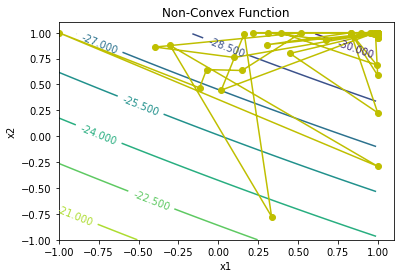

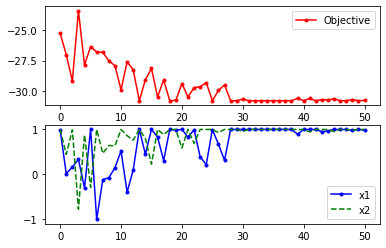

In [ ]:
# função objetivo (eggholder function)
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj = -(x2+47)*math.sin(math.sqrt(abs(x2+(x1/2)+47))) - x1*math.sin(math.sqrt(abs(x1-(x2+47))))
    return obj

# localização de partida
x_start = [0.8, -0.5]

# criando variáveis ​​em pontos de malha
i1 = np.arange(-1.0, 1.0, 0.01)
i2 = np.arange(-1.0, 1.0, 0.01)
x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = -(x2m[i][j]+47)*math.sin(math.sqrt(abs(x2m[i][j]+(x1m[i][j]/2)+47))) - x1m[i][j]*math.sin(math.sqrt(abs(x1m[i][j]-(x2m[i][j]+47))))

# criando um gráfico de contorno
plt.figure()
# contornos da plotagem
CS = plt.contour(x1m, x2m, fm)
# contornos de label
plt.clabel(CS, inline=1, fontsize=10)
# adicionando texto
plt.title('Non-Convex Function')
plt.xlabel('x1')
plt.ylabel('x2')


# RECOZIMENTO SIMULADO
# número de ciclos
n = 50
# número de tentativas por ciclo
m = 50
# número de soluções aceitas
na = 0.0
# probabilidade de aceitar a pior solução no início
p1 = 0.7
# probabilidade de aceitar a pior solução no final
p50 = 0.001
# twmpwratura inicial
t1 = -1.0/math.log(p1)
# temperatura final
t50 = -1.0/math.log(p50)
# redução fracionária a cada ciclo
frac = (t50/t1)**(1.0/(n-1.0))
# inicializando x
x = np.zeros((n+1,2))
x[0] = x_start
xi = np.zeros(2)
xi = x_start
na = na + 1.0
# melhores resultados até o momento
xc = np.zeros(2)
xc = x[0]
fc = f(xi)
fs = np.zeros(n+1)
fs[0] = fc
# temperatura atual
t = t1
# média DeltaE
DeltaE_avg = 0.0
for i in range(n):
    print('Ciclo ' + str(i) + ' com temperatura ' + str(t))
    for j in range(m):
        # gerando novos pontos de teste
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5
        # "segurando" nos limites superior e inferior
        xi[0] = max(min(xi[0],1.0),-1.0)
        xi[1] = max(min(xi[1],1.0),-1.0)
        DeltaE = abs(f(xi)-fc)
        if (f(xi)>fc):
            # inicializando DeltaE_avg se uma pior solução foi encontrada na primeira iteração
            if (i==0 and j==0): DeltaE_avg = DeltaE
            # função objetivo é pior
            # gerando probabilidade de aceitação
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determinando se aceita o pior ponto
            if (random.random()<p):
                # aceita a pior solução
                accept = True
            else:
                # rejeita a pior solução
                accept = False
        else:
            # função objetiva é inferior, aceita automaticamente
            accept = True
        if (accept==True):
            # atualização da solução atualmente aceita
            xc[0] = xi[0]
            xc[1] = xi[1]
            fc = f(xc)
            # incrementa o número de soluções aceitas
            na = na + 1.0
            # atualiza DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
    # registra os melhores valores de x no fim de cada ciclo
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    fs[i+1] = fc
    # diminui a temperatura para o próximo ciclo
    t = frac * t

# mostra a solução
print('\nMelhor solução: ' + str(xc))
print('Melhor objetivo: ' + str(fc) + '\n')

plt.plot(x[:,0],x[:,1],'y-o')

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0],'b.-')
ax2.plot(x[:,1],'g--')
ax2.legend(['x1','x2'])

plt.show()